DATASET: Retail Sales Dataset

Dataset Link: [link text](https://https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset?resource=download)


---



The primary objective of this project is to analyze a retail dataset to find trends in sales, seasonal patterns, and how different products performed in order to improve marketing strategies and business decisions.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('retail_sales_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
print(df.head())
print(" ")
print("df.describe")
df.describe()

# Get some info from dataset

   Transaction ID       Date Customer ID  Gender  Age Product Category  \
0               1 2023-11-24     CUST001    Male   34           Beauty   
1               2 2023-02-27     CUST002  Female   26         Clothing   
2               3 2023-01-13     CUST003    Male   50      Electronics   
3               4 2023-05-21     CUST004    Male   37         Clothing   
4               5 2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  Month  Year  
0         3              50           150     11  2023  
1         2             500          1000      2  2023  
2         1              30            30      1  2023  
3         1             500           500      5  2023  
4         2              50           100      5  2023  
 
df.describe


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount,Month,Year
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,6.549000,2023.002000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,1.000000,2023.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,4.000000,2023.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,6.000000,2023.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,10.000000,2023.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,12.000000,2024.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,3.452755,0.044699


In [ ]:
df['Date'] = pd.to_datetime(df['Date']) # Convert the column Date into datetimeformat

In [ ]:
# Check missing value
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [ ]:
# Group by date and sum the total amount
daily_sales = df.groupby('Date')['Total Amount'].sum().reset_index()

print(daily_sales)

          Date  Total Amount
0   2023-01-01          3600
1   2023-01-02          1765
2   2023-01-03           600
3   2023-01-04          1240
4   2023-01-05          1100
..         ...           ...
340 2023-12-27           700
341 2023-12-28          2075
342 2023-12-29          3400
343 2023-12-31            50
344 2024-01-01          1530

[345 rows x 2 columns]


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

The dataset included the following columns:



---



**Transaction ID**: A unique identifier for each transaction, allowing tracking and reference.

**Date**: The date when the transaction occurred, providing insights into sales trends over time.

**Customer ID:** A unique identifier for each customer, enabling customer-centric analysis.

**Gender:** The gender of the customer (Male/Female), offering insights into gender-based purchasing patterns.

**Age:** The age of the customer, facilitating segmentation and exploration of age-related influences.

**Product Category:** The category of the purchased product (e.g., Electronics, Clothing, Beauty), helping understand product preferences.

**Quantity:** The number of units of the product purchased, contributing to insights on purchase volumes.

**Price per Unit:** The price of one unit of the product, aiding in calculations related to total spending.

**Total Amount:** The total monetary value of the transaction, showcasing the financial impact of each purchase.

In [ ]:
# Extract month and year from the date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Only 2023
df_2023 = df[df['Year'] == 2023]

# Group by month and year
monthly_sales = df_2023.groupby(['Year', 'Month'])['Total Amount'].sum().reset_index()

# print(monthly_sales)

# Pivot data for better visualization
monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Year', values='Total Amount')

<Figure size 1200x600 with 0 Axes>

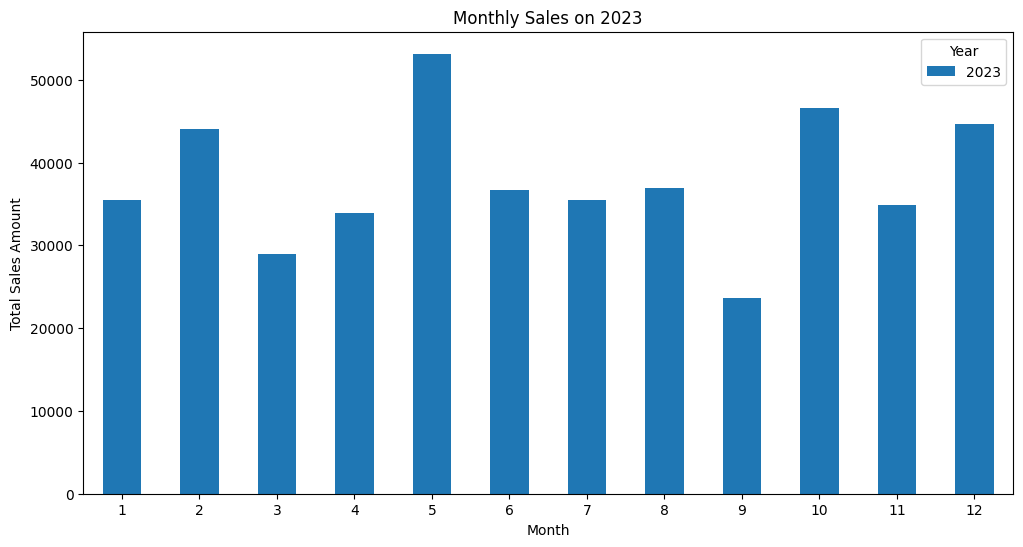

In [ ]:
# Plot monthly sales on 2023
plt.figure(figsize=(12, 6))
monthly_sales_pivot.plot(kind='bar', figsize=(12, 6))
plt.title('Monthly Sales on 2023')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()

From the chart above, we can see that the month of May, October, December, and February had the highest monthly sales on 2023.

In [ ]:
# Group by product category and sum the total amount
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Sort values
category_sales = category_sales.sort_values(by='Total Amount', ascending=False)

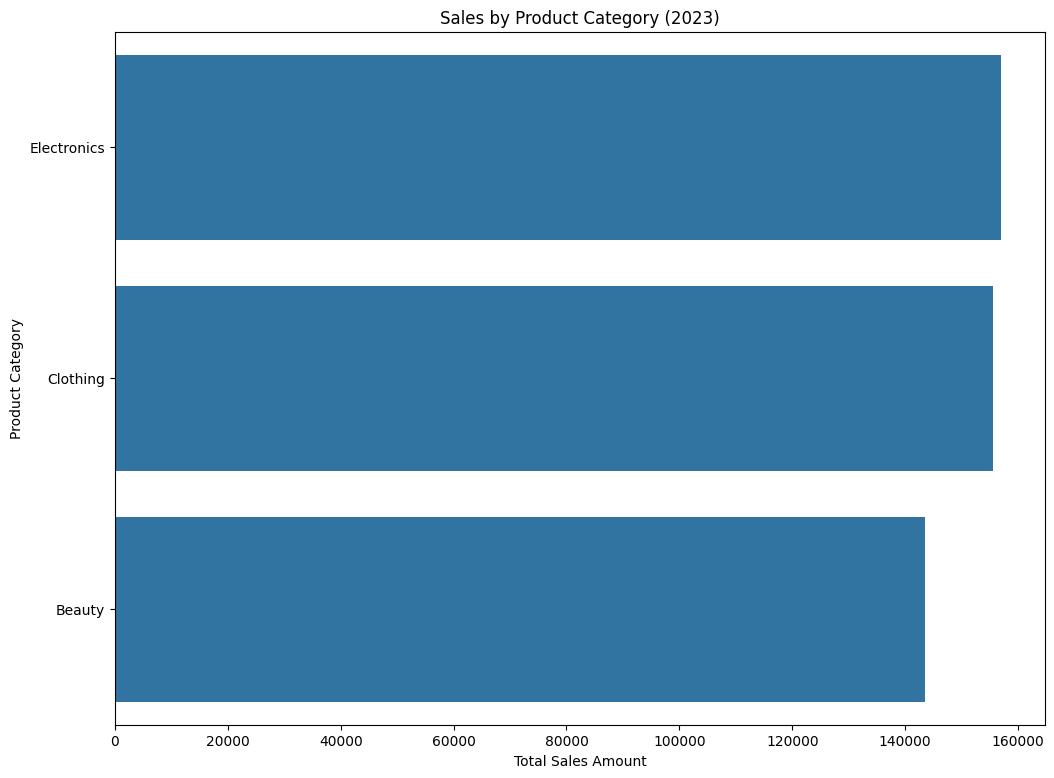

In [ ]:
# Plot product category performance on 2023
plt.figure(figsize=(12, 9))
bar_plot = sns.barplot(x='Total Amount', y='Product Category', data=category_sales)

plt.title('Sales by Product Category (2023)')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product Category')
plt.show()

In [ ]:
print(category_sales)

  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


Here, we can see that electronic and clothing are the top 2 product categories with the highest sale on 2023